# GLOBAL POWER ANALYSIS

![Power Plants](powerlines_snapshot.jpg)

***
Notebook Authors:

  [David Ambani](https://github.com/bulemi2)<br>
  [Cynthia Kareko](https://github.com/karekocyn)<br>
  [Joy Wangui](https://github.com/carfew001)<br>
  [Emmanuel Rono](https://github.com/marttech26)<br>

***

## 1. PROJECT OVERVIEW

### (a) Introduction

Investigating the global renewable energy landscape, this project plays a crucial role in uncovering complex patterns, identifying trends, and extracting meaningful insights. Our main goal is to provide a comprehensive understanding of renewable energy generation, capacity, and the changing importance of different renewable energy sources worldwide. Through rigorous analysis and predictive modeling methods, we aim to shed light on the past, present, and future dynamics of renewable energy production globally. In doing so, we seek to provide valuable insights to stakeholders, shaping the discourse on sustainable energy and enriching our collective knowledge of renewable energy infrastructure worldwide.

 ### (b) Business Understanding

In the current era marked by energy transitions and growing sustainability imperatives, the Global Renewable Energy Generation and Capacity Analysis project endeavors to decode the intricacies of the global renewable energy landscape. Through an in-depth exploration of various renewable energy sources, their capacities, and their contributions to renewable energy generation, the project aims to offer a comprehensive overview of the global renewable energy ecosystem. These insights will equip stakeholders, policymakers, and investors with valuable knowledge about the factors influencing the renewable energy industry, enabling informed decision-making in this rapidly evolving and crucial sector.

This Global Renewable Energy Analysis is set to benefit the following stakeholders;

- Power generation companies-Strategic planning
- Environmental Agencies-Providing environmental impact assessment
- Researchers and Academia-Contributing to advancements in energy studies
- Local communities-Informed community engagement
- Technology providers-Market identification and growth opportunities
- Government and Regulatory Bodies-Informed decision making
- Energy companies and investors looking for opportunities in the renewable energy market.


### (c) Problem Statement

The absence of a comprehensive analysis of global renewable energy data impedes stakeholders' ability to make informed decisions in the evolving energy landscape. There is a pressing need for a systematic exploration of renewable energy generation, capacity trends, and the impact of renewable energy sources on global energy production. This project aims to address the lack of actionable insights, which hinders effective decision-making for governments, investors, and energy companies, by providing a clear understanding of the global renewable energy scenario through data-driven analysis.

Our strategic approach involves a meticulous examination of data preprocessing, thoughtful selection of modeling techniques, and the establishment of robust evaluation metrics. This comprehensive methodology seeks to offer a detailed exploration of the global renewable energy landscape, enabling stakeholders to make well-informed decisions in a rapidly transforming sector. The ultimate objective is to bridge the gap in actionable insights, facilitating informed decision-making and promoting a deeper understanding of the intricate dynamics shaping the global renewable energy infrastructure.

### (d) Research Questions

- How has the production of electricity from renewable sources changed over time? <br>

- Which renewable energy source shows the most significant growth, and what are the underlying reasons for this trend?<br>

- To what extent has the adoption of renewable energy sources impacted the overall energy mix, and what are the key challenges and opportunities associated with integrating renewable technologies into the global power infrastructure?<br>

### (e) The Main Objective

To construct a predictive model utilizing the examination of worldwide renewable energy data to precisely anticipate the generation of renewable energy from various other sources.

### (f) The Specific Objectives


Specific Objectives

- To assess the role each renewable energy source plays in the overall energy blend.
- To identify opportunities to enhance the portion of renewable energy in global electricity production, optimizing the shift towards sustainable sources.
- To examine how renewable energy is distributed among different power regions.

### (g) Data Understanding

Entity	Code	Year	Electricity from wind - TWh	Electricity from hydro - TWh	Electricity from solar - TWh	Other renewables including bioenergy - TWh

The dataset contains the following columns with their descriptions:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [4]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `fuel (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_ (number): electricity generation in gigawatt-hours reported
- `estimated_generation_gwh` (number): estimated annual electricity generation in gigawatt-hours

The database is available for immediate download and use through the http://datasets.wri.org/dataset/globalpowerplantdatabase

**Importing libraries**

In [1]:
# Data manipulation and analysis
import pandas as pd  

# Creating visualizations
import matplotlib.pyplot as plt  

# Statistical data visualization
import seaborn as sns  

# Numerical operations
import numpy as np  

import pickle

# Working with geospatial data
# from geopy.distance import great_circle
# import geopandas as gpd

# Handling date and time information
import datetime as dt  

# Mathematical functions
import math  

# Importing from functions.py
from functions import plot_top_n, plot_top_and_bottom_countries_by_capacity, plot_capacity_generation_scatter, plot_power_plant_distribution

# Importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline

## 2. Data Cleaning

###### Loading 1st CSV

In [2]:
# Read CSV file into data frame
df = pd.read_csv('modern-renewable-prod.csv')

In [3]:
#Check the first few rows of the DataFrame
df.head()

,Entity,Code,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh
0,ASEAN (Ember),NaN,2000,0.0,50.37,0.0,22.400000
1,ASEAN (Ember),NaN,2001,0.0,54.26,0.0,22.289999
2,ASEAN (Ember),NaN,2002,0.0,53.32,0.0,22.540000
3,ASEAN (Ember),NaN,2003,0.0,53.28,0.0,22.250000
4,ASEAN (Ember),NaN,2004,0.0,52.88,0.0,24.039999


In [4]:
# Display the shape of the DataFrame
df.shape

(8961, 7)

In [5]:
# drop uneccesary column
df.drop(columns=['Code'], inplace= True)

This indicates that the DataFrame comprises 34,936 rows and 36 columns. Each row corresponds to an individual power plant, and the columns represent the characteristics or attributes associated with these interactions.

In [6]:
#Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      8961 non-null   object 
 1   Year                                        8961 non-null   int64  
 2   Electricity from wind - TWh                 8000 non-null   float64
 3   Electricity from hydro - TWh                8863 non-null   float64
 4   Electricity from solar - TWh                7956 non-null   float64
 5   Other renewables including bioenergy - TWh  8148 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 420.2+ KB


##### Load 2nd CSV

In [7]:
df2 = pd.read_csv('electricity-generation.csv')
df2

,Entity,Code,Year,Electricity generation - TWh
0,ASEAN (Ember),NaN,2000,368.08
1,ASEAN (Ember),NaN,2001,396.60
2,ASEAN (Ember),NaN,2002,423.11
3,ASEAN (Ember),NaN,2003,447.70
4,ASEAN (Ember),NaN,2004,485.55
...,...,...,...,...
7190,Zimbabwe,ZWE,2017,7.35
7191,Zimbabwe,ZWE,2018,9.19
7192,Zimbabwe,ZWE,2019,8.24
7193,Zimbabwe,ZWE,2020,7.59


In [8]:
df2.drop(columns=['Code'], inplace=True)
df2

,Entity,Year,Electricity generation - TWh
0,ASEAN (Ember),2000,368.08
1,ASEAN (Ember),2001,396.60
2,ASEAN (Ember),2002,423.11
3,ASEAN (Ember),2003,447.70
4,ASEAN (Ember),2004,485.55
...,...,...,...
7190,Zimbabwe,2017,7.35
7191,Zimbabwe,2018,9.19
7192,Zimbabwe,2019,8.24
7193,Zimbabwe,2020,7.59


In [9]:
df2.isna().sum()

Entity                          0
Year                            0
Electricity generation - TWh    0
dtype: int64

##### Merging the two CSVs

In [10]:
# df and df have 2 similar columns, Entity and Year. We'll merge on the two columns
merged_df = pd.merge(df, df2, on=['Entity', 'Year'], how='inner')

In [11]:
merged_df

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh
0,ASEAN (Ember),2000,0.0,50.37,0.00,22.400000,368.08
1,ASEAN (Ember),2001,0.0,54.26,0.00,22.289999,396.60
2,ASEAN (Ember),2002,0.0,53.32,0.00,22.540000,423.11
3,ASEAN (Ember),2003,0.0,53.28,0.00,22.250000,447.70
4,ASEAN (Ember),2004,0.0,52.88,0.00,24.039999,485.55
...,...,...,...,...,...,...,...
7160,Zimbabwe,2017,0.0,3.97,0.01,0.320000,7.35
7161,Zimbabwe,2018,0.0,5.05,0.02,0.390000,9.19
7162,Zimbabwe,2019,0.0,4.17,0.03,0.380000,8.24
7163,Zimbabwe,2020,0.0,3.81,0.03,0.350000,7.59


In [12]:
# Display descriptive statistics of the DataFrame
merged_df.describe()

,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh
count,7165.000000,6991.000000,7090.000000,6960.000000,6939.000000,7165.000000
mean,2006.685694,20.059922,125.594440,8.045666,15.086068,775.965934
std,9.814956,108.216546,396.238133,55.197334,55.550644,2551.955743
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.000000,0.000000,0.050000,0.000000,0.000000,2.260000
50%,2008.000000,0.000000,3.230000,0.000000,0.050000,21.438768
75%,2015.000000,0.310000,25.350646,0.040000,2.055000,153.030000
max,2022.000000,2098.460000,4339.530000,1310.020000,771.910000,28660.980000


In [13]:
#Check the unique values in each column
merged_df.nunique()

Entity                                         251
Year                                            38
Electricity from wind - TWh                   1544
Electricity from hydro - TWh                  3515
Electricity from solar - TWh                  1125
Other renewables including bioenergy - TWh    2212
Electricity generation - TWh                  4905
dtype: int64

In [14]:
merged_df.isna().sum()

Entity                                          0
Year                                            0
Electricity from wind - TWh                   174
Electricity from hydro - TWh                   75
Electricity from solar - TWh                  205
Other renewables including bioenergy - TWh    226
Electricity generation - TWh                    0
dtype: int64

In [15]:
#fill nulls
merged_df.fillna(0, inplace=True)

In [16]:
merged_df.isna().sum()

Entity                                        0
Year                                          0
Electricity from wind - TWh                   0
Electricity from hydro - TWh                  0
Electricity from solar - TWh                  0
Other renewables including bioenergy - TWh    0
Electricity generation - TWh                  0
dtype: int64

In [17]:
merged_df.dtypes

Entity                                         object
Year                                            int64
Electricity from wind - TWh                   float64
Electricity from hydro - TWh                  float64
Electricity from solar - TWh                  float64
Other renewables including bioenergy - TWh    float64
Electricity generation - TWh                  float64
dtype: object

In [18]:
merged_df

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh
0,ASEAN (Ember),2000,0.0,50.37,0.00,22.400000,368.08
1,ASEAN (Ember),2001,0.0,54.26,0.00,22.289999,396.60
2,ASEAN (Ember),2002,0.0,53.32,0.00,22.540000,423.11
3,ASEAN (Ember),2003,0.0,53.28,0.00,22.250000,447.70
4,ASEAN (Ember),2004,0.0,52.88,0.00,24.039999,485.55
...,...,...,...,...,...,...,...
7160,Zimbabwe,2017,0.0,3.97,0.01,0.320000,7.35
7161,Zimbabwe,2018,0.0,5.05,0.02,0.390000,9.19
7162,Zimbabwe,2019,0.0,4.17,0.03,0.380000,8.24
7163,Zimbabwe,2020,0.0,3.81,0.03,0.350000,7.59


### Feature Engineering

In [19]:
# 1. Total Renewable Electricity - TWh
merged_df['Total Renewable Electricity - TWh'] = merged_df['Electricity from wind - TWh'] + merged_df['Electricity from hydro - TWh'] + merged_df['Electricity from solar - TWh'] + merged_df['Other renewables including bioenergy - TWh']
merged_df

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh
0,ASEAN (Ember),2000,0.0,50.37,0.00,22.400000,368.08,72.770000
1,ASEAN (Ember),2001,0.0,54.26,0.00,22.289999,396.60,76.549999
2,ASEAN (Ember),2002,0.0,53.32,0.00,22.540000,423.11,75.860000
3,ASEAN (Ember),2003,0.0,53.28,0.00,22.250000,447.70,75.530000
4,ASEAN (Ember),2004,0.0,52.88,0.00,24.039999,485.55,76.919999
...,...,...,...,...,...,...,...,...
7160,Zimbabwe,2017,0.0,3.97,0.01,0.320000,7.35,4.300000
7161,Zimbabwe,2018,0.0,5.05,0.02,0.390000,9.19,5.460000
7162,Zimbabwe,2019,0.0,4.17,0.03,0.380000,8.24,4.580000
7163,Zimbabwe,2020,0.0,3.81,0.03,0.350000,7.59,4.190000


In [20]:
# 2. Non-Renewable Electricity - TWh
merged_df['Electricity from Non-Renewables - TWh'] = merged_df['Electricity generation - TWh'] - merged_df['Total Renewable Electricity - TWh']
merged_df

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh
0,ASEAN (Ember),2000,0.0,50.37,0.00,22.400000,368.08,72.770000,295.310000
1,ASEAN (Ember),2001,0.0,54.26,0.00,22.289999,396.60,76.549999,320.050001
2,ASEAN (Ember),2002,0.0,53.32,0.00,22.540000,423.11,75.860000,347.250000
3,ASEAN (Ember),2003,0.0,53.28,0.00,22.250000,447.70,75.530000,372.170000
4,ASEAN (Ember),2004,0.0,52.88,0.00,24.039999,485.55,76.919999,408.630001
...,...,...,...,...,...,...,...,...,...
7160,Zimbabwe,2017,0.0,3.97,0.01,0.320000,7.35,4.300000,3.050000
7161,Zimbabwe,2018,0.0,5.05,0.02,0.390000,9.19,5.460000,3.730000
7162,Zimbabwe,2019,0.0,4.17,0.03,0.380000,8.24,4.580000,3.660000
7163,Zimbabwe,2020,0.0,3.81,0.03,0.350000,7.59,4.190000,3.400000


## 3. Exploratory Data Analysis (EDA)

With our data now cleaned and prepared, our next step involves visualizing it. The primary focus is on creating graphs and visuals to enhance our visual understanding of the data's insights. Seaborn and Matplotlib will be employed as the main tools for this visualization process.

In [21]:
merged_df

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh
0,ASEAN (Ember),2000,0.0,50.37,0.00,22.400000,368.08,72.770000,295.310000
1,ASEAN (Ember),2001,0.0,54.26,0.00,22.289999,396.60,76.549999,320.050001
2,ASEAN (Ember),2002,0.0,53.32,0.00,22.540000,423.11,75.860000,347.250000
3,ASEAN (Ember),2003,0.0,53.28,0.00,22.250000,447.70,75.530000,372.170000
4,ASEAN (Ember),2004,0.0,52.88,0.00,24.039999,485.55,76.919999,408.630001
...,...,...,...,...,...,...,...,...,...
7160,Zimbabwe,2017,0.0,3.97,0.01,0.320000,7.35,4.300000,3.050000
7161,Zimbabwe,2018,0.0,5.05,0.02,0.390000,9.19,5.460000,3.730000
7162,Zimbabwe,2019,0.0,4.17,0.03,0.380000,8.24,4.580000,3.660000
7163,Zimbabwe,2020,0.0,3.81,0.03,0.350000,7.59,4.190000,3.400000


In [22]:
merged_df.columns

Index(['Entity', 'Year', 'Electricity from wind - TWh',
       'Electricity from hydro - TWh', 'Electricity from solar - TWh',
       'Other renewables including bioenergy - TWh',
       'Electricity generation - TWh', 'Total Renewable Electricity - TWh',
       'Electricity from Non-Renewables - TWh'],
      dtype='object')

In [23]:
merged_df.dtypes

Entity                                         object
Year                                            int64
Electricity from wind - TWh                   float64
Electricity from hydro - TWh                  float64
Electricity from solar - TWh                  float64
Other renewables including bioenergy - TWh    float64
Electricity generation - TWh                  float64
Total Renewable Electricity - TWh             float64
Electricity from Non-Renewables - TWh         float64
dtype: object

In [24]:
# df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [25]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7165 entries, 0 to 7164
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      7165 non-null   object 
 1   Year                                        7165 non-null   int64  
 2   Electricity from wind - TWh                 7165 non-null   float64
 3   Electricity from hydro - TWh                7165 non-null   float64
 4   Electricity from solar - TWh                7165 non-null   float64
 5   Other renewables including bioenergy - TWh  7165 non-null   float64
 6   Electricity generation - TWh                7165 non-null   float64
 7   Total Renewable Electricity - TWh           7165 non-null   float64
 8   Electricity from Non-Renewables - TWh       7165 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 559.8+ KB


In [26]:
merged_df

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh
0,ASEAN (Ember),2000,0.0,50.37,0.00,22.400000,368.08,72.770000,295.310000
1,ASEAN (Ember),2001,0.0,54.26,0.00,22.289999,396.60,76.549999,320.050001
2,ASEAN (Ember),2002,0.0,53.32,0.00,22.540000,423.11,75.860000,347.250000
3,ASEAN (Ember),2003,0.0,53.28,0.00,22.250000,447.70,75.530000,372.170000
4,ASEAN (Ember),2004,0.0,52.88,0.00,24.039999,485.55,76.919999,408.630001
...,...,...,...,...,...,...,...,...,...
7160,Zimbabwe,2017,0.0,3.97,0.01,0.320000,7.35,4.300000,3.050000
7161,Zimbabwe,2018,0.0,5.05,0.02,0.390000,9.19,5.460000,3.730000
7162,Zimbabwe,2019,0.0,4.17,0.03,0.380000,8.24,4.580000,3.660000
7163,Zimbabwe,2020,0.0,3.81,0.03,0.350000,7.59,4.190000,3.400000


### (a) Univariate Data Analysis

Univariate Analysis:


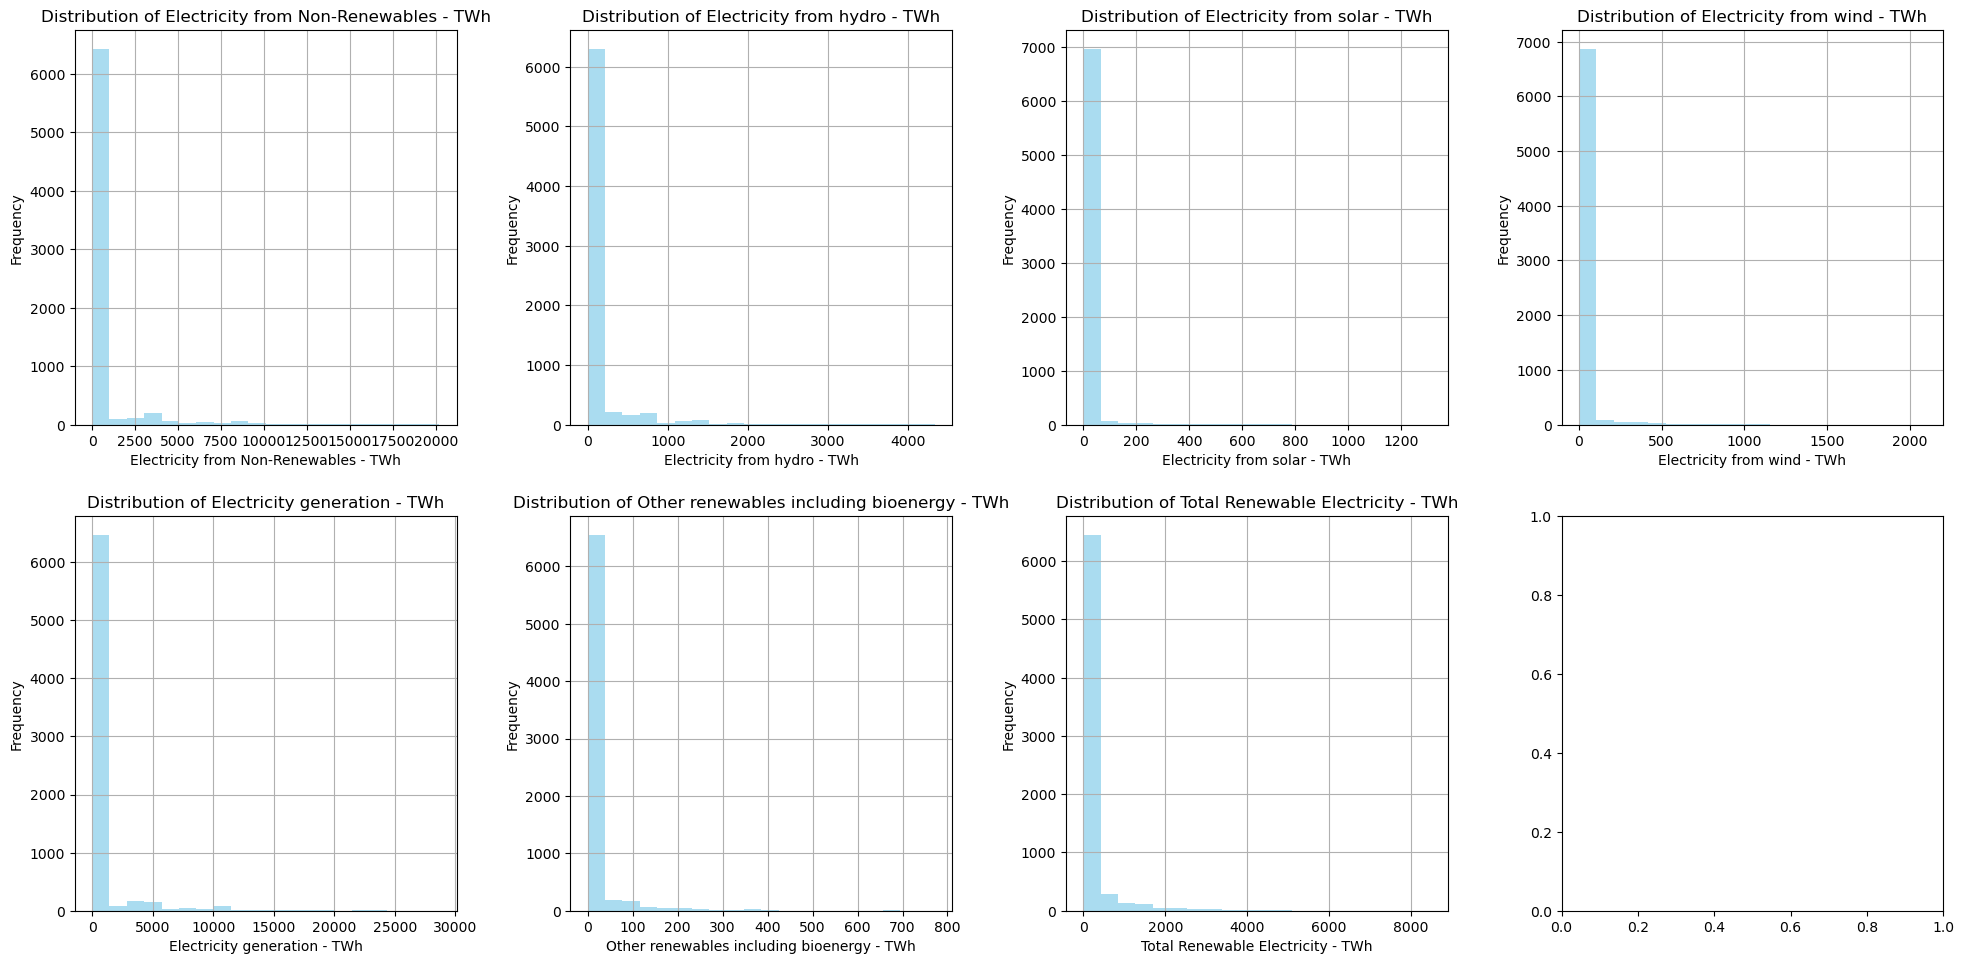

In [27]:
# Univariate Analysis with histograms
print("Univariate Analysis:")
num_cols = merged_df.columns.difference(['Entity', 'Year'])  # Exclude non-numeric columns
num_plots = len(num_cols)
fig, axes = plt.subplots(nrows=2, ncols=num_plots // 2 + num_plots % 2, figsize=(20, 10))

for i, col in enumerate(num_cols):
    row_index = i // (num_plots // 2 + num_plots % 2)
    col_index = i % (num_plots // 2 + num_plots % 2)
    merged_df[col].hist(ax=axes[row_index, col_index], bins=20, color='skyblue', alpha=0.7)
    axes[row_index, col_index].set_title(f'Distribution of {col}')
    axes[row_index, col_index].set_xlabel(col)
    axes[row_index, col_index].set_ylabel('Frequency')

plt.tight_layout(pad=2.0)
plt.show()


### (b) Bivariate Data Analysis


Bivariate Analysis:


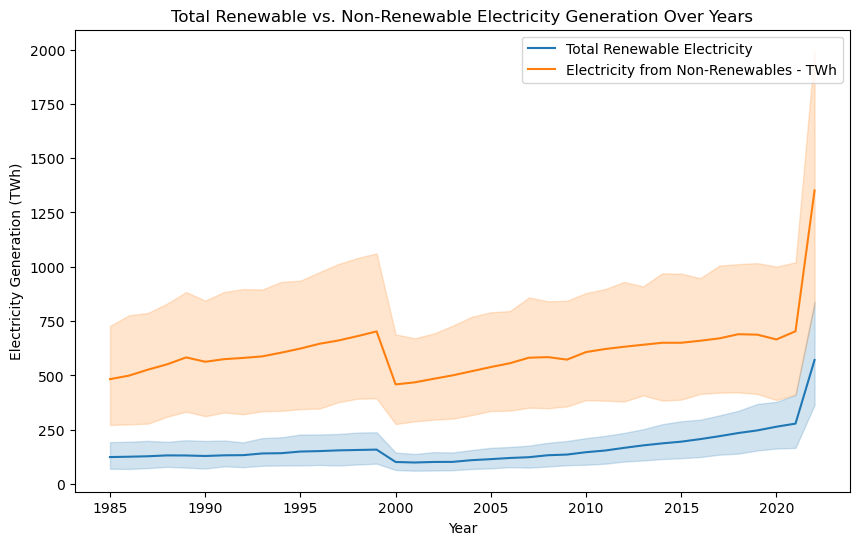

In [28]:
# Bivariate Analysis
print("\nBivariate Analysis:")
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_df, x='Year', y='Total Renewable Electricity - TWh', label='Total Renewable Electricity')
sns.lineplot(data=merged_df, x='Year', y='Electricity from Non-Renewables - TWh', label='Electricity from Non-Renewables - TWh')
plt.title('Total Renewable vs. Non-Renewable Electricity Generation Over Years')
plt.xlabel('Year')
plt.ylabel('Electricity Generation (TWh)')
plt.legend()
plt.show()

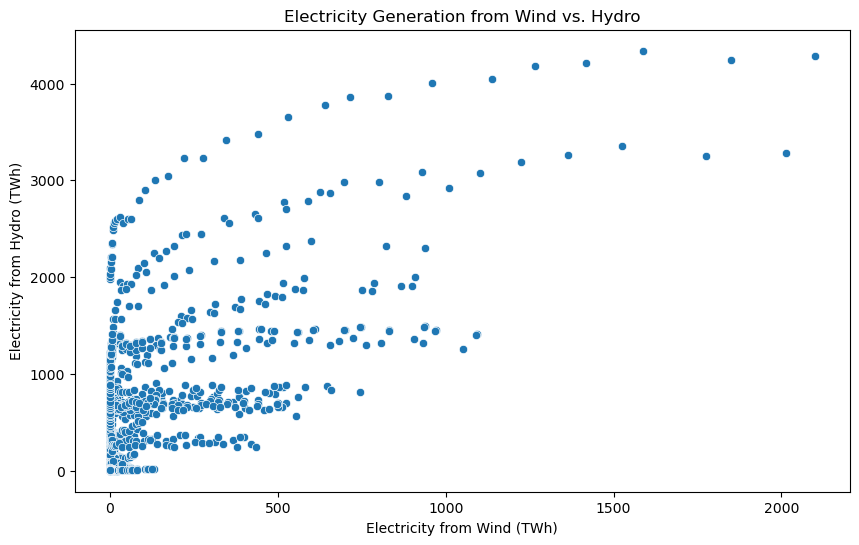

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Electricity from wind - TWh', y='Electricity from hydro - TWh')
plt.title('Electricity Generation from Wind vs. Hydro')
plt.xlabel('Electricity from Wind (TWh)')
plt.ylabel('Electricity from Hydro (TWh)')
plt.show()

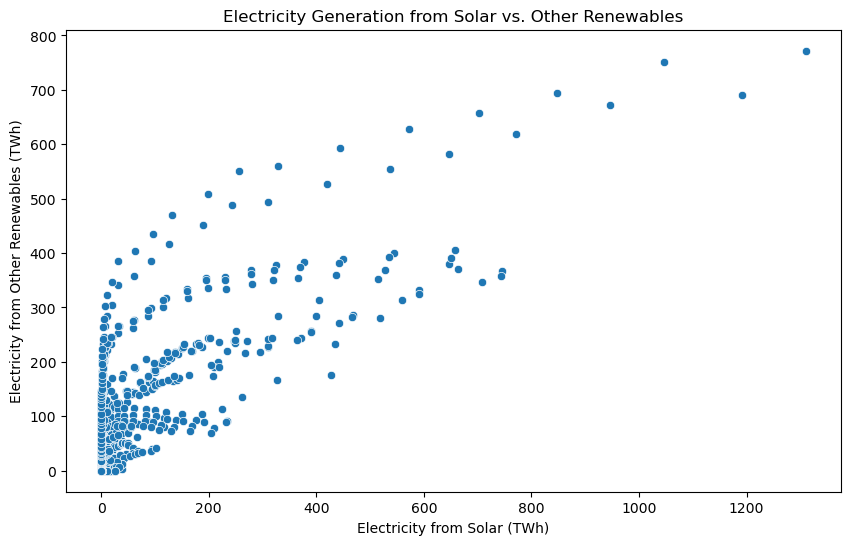

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Electricity from solar - TWh', y='Other renewables including bioenergy - TWh')
plt.title('Electricity Generation from Solar vs. Other Renewables')
plt.xlabel('Electricity from Solar (TWh)')
plt.ylabel('Electricity from Other Renewables (TWh)')
plt.show()

In [31]:
merged_df.columns

Index(['Entity', 'Year', 'Electricity from wind - TWh',
       'Electricity from hydro - TWh', 'Electricity from solar - TWh',
       'Other renewables including bioenergy - TWh',
       'Electricity generation - TWh', 'Total Renewable Electricity - TWh',
       'Electricity from Non-Renewables - TWh'],
      dtype='object')

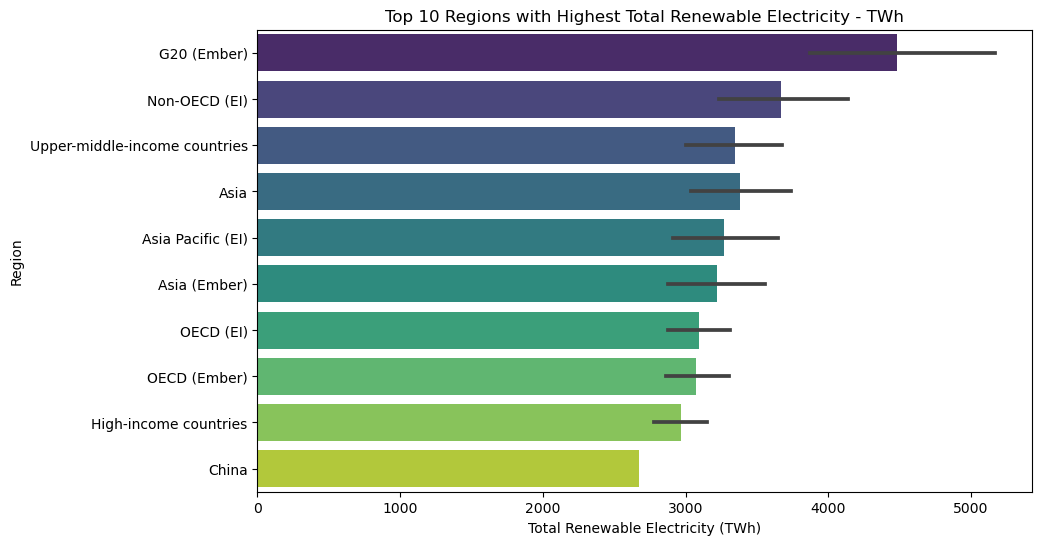

In [32]:
# Filter out the rows where the region is "World"
df_filtered = merged_df[merged_df['Entity'] != 'World']

top_renewable_regions = df_filtered.sort_values(by='Total Renewable Electricity - TWh', ascending=False).head(70)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_renewable_regions, x='Total Renewable Electricity - TWh', y='Entity', palette='viridis')
plt.title('Top 10 Regions with Highest Total Renewable Electricity - TWh')
plt.xlabel('Total Renewable Electricity (TWh)')
plt.ylabel('Region')
plt.show()

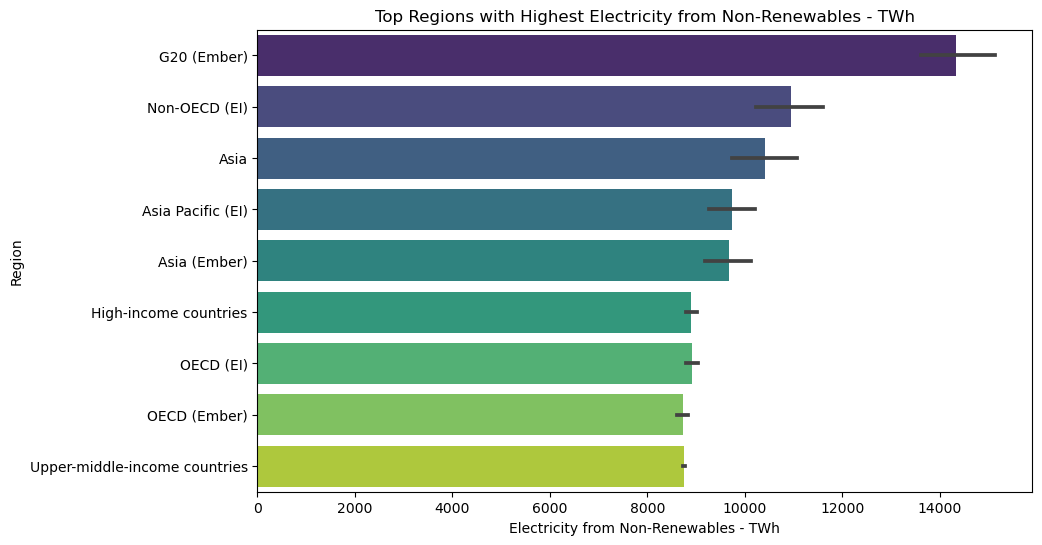

In [33]:
# Filter out the rows where the region is "World"
df_filtered = merged_df[merged_df['Entity'] != 'World']

top_non_renewable_regions = df_filtered.sort_values(by='Electricity from Non-Renewables - TWh', ascending=False).head(100)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_non_renewable_regions, x='Electricity from Non-Renewables - TWh', y='Entity', palette='viridis')
plt.title('Top Regions with Highest Electricity from Non-Renewables - TWh')
plt.xlabel('Electricity from Non-Renewables - TWh')
plt.ylabel('Region')
plt.show()


Correlation Analysis:


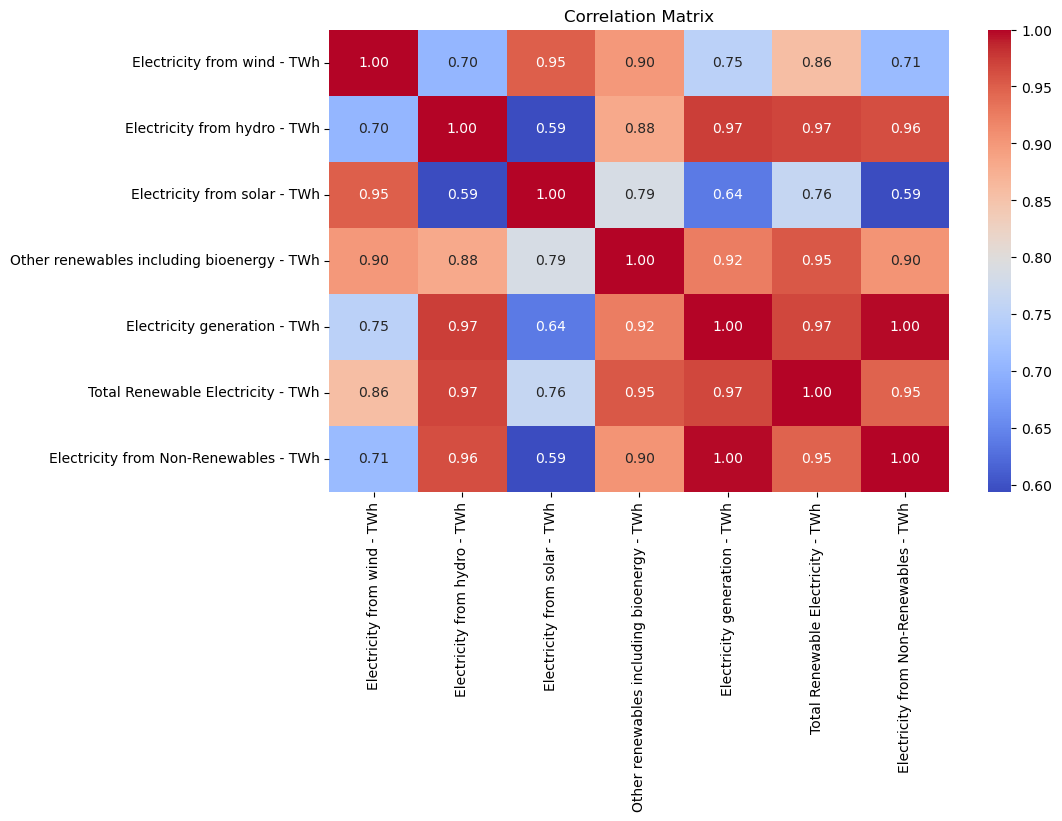

In [34]:
# Correlation Analysis
print("\nCorrelation Analysis:")
correlation_matrix = merged_df.drop(columns=['Entity', 'Year']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [35]:
# Save the DataFrame 'df_cleaned' to a CSV file named 'modelling.csv'
merged_df.to_csv('modelling.csv', index=False)

## 4. MODELLING 


In [36]:
modelling = pd.read_csv('modelling.csv')
modelling

,Entity,Year,Electricity from wind - TWh,Electricity from hydro - TWh,Electricity from solar - TWh,Other renewables including bioenergy - TWh,Electricity generation - TWh,Total Renewable Electricity - TWh,Electricity from Non-Renewables - TWh
0,ASEAN (Ember),2000,0.0,50.37,0.00,22.400000,368.08,72.770000,295.310000
1,ASEAN (Ember),2001,0.0,54.26,0.00,22.289999,396.60,76.549999,320.050001
2,ASEAN (Ember),2002,0.0,53.32,0.00,22.540000,423.11,75.860000,347.250000
3,ASEAN (Ember),2003,0.0,53.28,0.00,22.250000,447.70,75.530000,372.170000
4,ASEAN (Ember),2004,0.0,52.88,0.00,24.039999,485.55,76.919999,408.630001
...,...,...,...,...,...,...,...,...,...
7160,Zimbabwe,2017,0.0,3.97,0.01,0.320000,7.35,4.300000,3.050000
7161,Zimbabwe,2018,0.0,5.05,0.02,0.390000,9.19,5.460000,3.730000
7162,Zimbabwe,2019,0.0,4.17,0.03,0.380000,8.24,4.580000,3.660000
7163,Zimbabwe,2020,0.0,3.81,0.03,0.350000,7.59,4.190000,3.400000


In [37]:
modelling.corr()['Electricity generation - TWh']

Year                                          0.043695
Electricity from wind - TWh                   0.749813
Electricity from hydro - TWh                  0.973237
Electricity from solar - TWh                  0.637262
Other renewables including bioenergy - TWh    0.924123
Electricity generation - TWh                  1.000000
Total Renewable Electricity - TWh             0.967615
Electricity from Non-Renewables - TWh         0.997450
Name: Electricity generation - TWh, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
modelling.columns

Index(['Entity', 'Year', 'Electricity from wind - TWh',
       'Electricity from hydro - TWh', 'Electricity from solar - TWh',
       'Other renewables including bioenergy - TWh',
       'Electricity generation - TWh', 'Total Renewable Electricity - TWh',
       'Electricity from Non-Renewables - TWh'],
      dtype='object')

In [40]:
modelling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7165 entries, 0 to 7164
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      7165 non-null   object 
 1   Year                                        7165 non-null   int64  
 2   Electricity from wind - TWh                 7165 non-null   float64
 3   Electricity from hydro - TWh                7165 non-null   float64
 4   Electricity from solar - TWh                7165 non-null   float64
 5   Other renewables including bioenergy - TWh  7165 non-null   float64
 6   Electricity generation - TWh                7165 non-null   float64
 7   Total Renewable Electricity - TWh           7165 non-null   float64
 8   Electricity from Non-Renewables - TWh       7165 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 503.9+ KB


# 1. predicting for WIND

In [41]:
# Select relevant columns
X = modelling[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
        'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
        'Total Renewable Electricity - TWh', 'Electricity from Non-Renewables - TWh', 'Year']]
y = modelling['Electricity from wind - TWh']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define preprocessing steps for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and linear regression model
pipeline_wind = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipeline_wind.fit(X_train, y_train)

# Make predictions on both training and testing data
y_train_pred = pipeline_wind.predict(X_train)
y_test_pred = pipeline_wind.predict(X_test)

# Calculate error metrics for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print error metrics
print('Training Set Metrics:')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'R-squared (R2) Score: {train_r2}')
print('\nTesting Set Metrics:')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'R-squared (R2) Score: {test_r2}')

Training Set Metrics:
Mean Squared Error (MSE): 4.0578645588758395e-07
Mean Absolute Error (MAE): 0.0002676782616606182
R-squared (R2) Score: 0.999999999967686

Testing Set Metrics:
Mean Squared Error (MSE): 5.079297545356344e-07
Mean Absolute Error (MAE): 0.00029404246639530454
R-squared (R2) Score: 0.9999999999423739


In [75]:

# Specify the file path to save the pickled object
file_path = 'pipeline_wind.pkl'

# Pickle the pipeline_wind object
with open(file_path, 'wb') as file:
    pickle.dump(pipeline_wind, file)


In [42]:
# Create DataFrames for predicted and actual values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [43]:
train_results

,Actual,Predicted
6807,0.000000,0.002180
5227,0.000000,0.000149
2722,0.000000,-0.000102
5777,0.000000,0.000048
108,2.284582,2.284698
...,...,...
3772,85.100000,85.099683
5191,0.000000,-0.000590
5226,0.000000,0.000149
5390,2.640000,2.640119


In [44]:
test_results

,Actual,Predicted
1706,0.92000,0.920293
457,574.49384,574.494910
6508,0.53000,0.529958
5690,0.00000,0.000030
6844,0.00000,-0.000046
...,...,...
3656,0.00000,-0.000009
1496,0.00000,-0.000047
3279,0.28000,0.279944
1520,1.80000,1.799924


# 2. predicting for HYDRO

In [45]:
# Select relevant columns
X_1 = modelling[['Entity', 'Electricity generation - TWh', 'Electricity from wind - TWh', 
        'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh', 
        'Total Renewable Electricity - TWh', 'Electricity from Non-Renewables - TWh', 'Year']]
y_1 = modelling['Electricity from hydro - TWh']

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, test_size=0.3, random_state=42)

# Define preprocessing steps for the pipeline
preprocessor1 = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and linear regression model
pipeline_hydro = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipeline_hydro.fit(X_train1, y_train1)

# Make predictions on both training and testing data
y_train_pred1 = pipeline_hydro.predict(X_train1)
y_test_pred1 = pipeline_hydro.predict(X_test1)

# Calculate error metrics for training and testing sets
train_mse = mean_squared_error(y_train1, y_train_pred1)
test_mse = mean_squared_error(y_test1, y_test_pred1)
train_mae = mean_absolute_error(y_train1, y_train_pred1)
test_mae = mean_absolute_error(y_test1, y_test_pred1)
train_r2 = r2_score(y_train1, y_train_pred1)
test_r2 = r2_score(y_test1, y_test_pred1)

# Print error metrics
print('Training Set Metrics:')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'R-squared (R2) Score: {train_r2}')
print('\nTesting Set Metrics:')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'R-squared (R2) Score: {test_r2}')

Training Set Metrics:
Mean Squared Error (MSE): 3.7105757763443164e-08
Mean Absolute Error (MAE): 7.926960254221213e-05
R-squared (R2) Score: 0.9999999999997695

Testing Set Metrics:
Mean Squared Error (MSE): 4.5514916349365887e-08
Mean Absolute Error (MAE): 8.995973520635077e-05
R-squared (R2) Score: 0.9999999999996808


In [76]:
# Specify the file path to save the pickled object
file_path = 'pipeline_hydro.pkl'

# Pickle the pipeline_wind object
with open(file_path, 'wb') as file:
    pickle.dump(pipeline_hydro, file)

In [46]:
# Create DataFrames for predicted and actual values
train_results = pd.DataFrame({'Actual': y_train1, 'Predicted': y_train_pred1})
test_results = pd.DataFrame({'Actual': y_test1, 'Predicted': y_test_pred1})

In [47]:
train_results

,Actual,Predicted
6807,634.718750,634.720091
5227,1.960000,1.959995
2722,4.650000,4.649981
5777,0.000000,-0.000007
108,107.679985,107.680040
...,...,...
3772,497.970000,497.969998
5191,7.840000,7.839817
5226,1.930000,1.929996
5390,12.070000,12.070030


In [48]:
test_results

,Actual,Predicted
1706,0.0300,0.030045
457,1864.6387,1864.638877
6508,0.0600,0.059994
5690,11.4100,11.410013
6844,9.4400,9.440006
...,...,...
3656,0.0000,0.000033
1496,0.0000,-0.000006
3279,0.1400,0.139988
1520,7.7500,7.749984


In [51]:
# Create DataFrames for predicted and actual values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [52]:
train_results

,Actual,Predicted
6807,634.718750,634.720091
5227,1.960000,1.959995
2722,4.650000,4.649981
5777,0.000000,-0.000007
108,107.679985,107.680040
...,...,...
3772,497.970000,497.969998
5191,7.840000,7.839817
5226,1.930000,1.929996
5390,12.070000,12.070030


In [53]:
test_results

,Actual,Predicted
1706,0.0300,0.030045
457,1864.6387,1864.638877
6508,0.0600,0.059994
5690,11.4100,11.410013
6844,9.4400,9.440006
...,...,...
3656,0.0000,0.000033
1496,0.0000,-0.000006
3279,0.1400,0.139988
1520,7.7500,7.749984


# 3. predicting for SOLAR

In [54]:
# Select relevant columns
X = modelling[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
        'Electricity from wind - TWh', 'Other renewables including bioenergy - TWh', 
        'Total Renewable Electricity - TWh', 'Electricity from Non-Renewables - TWh', 'Year']]
y = modelling['Electricity from solar - TWh']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define preprocessing steps for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and linear regression model
pipeline_solar = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipeline_solar.fit(X_train, y_train)

# Make predictions on both training and testing data
y_train_pred = pipeline_solar.predict(X_train)
y_test_pred = pipeline_solar.predict(X_test)

# Calculate error metrics for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print error metrics
print('Training Set Metrics:')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'R-squared (R2) Score: {train_r2}')
print('\nTesting Set Metrics:')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'R-squared (R2) Score: {test_r2}')

Training Set Metrics:
Mean Squared Error (MSE): 2.3367450653688176e-07
Mean Absolute Error (MAE): 0.00019407840481477156
R-squared (R2) Score: 0.9999999999312116

Testing Set Metrics:
Mean Squared Error (MSE): 2.543443567569814e-07
Mean Absolute Error (MAE): 0.0002078458888196749
R-squared (R2) Score: 0.9999999998691306


In [77]:
# Specify the file path to save the pickled object
file_path = 'pipeline_solar.pkl'

# Pickle the pipeline_wind object
with open(file_path, 'wb') as file:
    pickle.dump(pipeline_solar, file)

In [55]:
# Create DataFrames for predicted and actual values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [56]:
train_results

,Actual,Predicted
6807,0.000000,-0.000518
5227,0.000000,-0.000153
2722,0.000000,0.000061
5777,0.000000,-0.000034
108,0.216052,0.216107
...,...,...
3772,68.170000,68.170447
5191,0.000000,0.000221
5226,0.000000,-0.000150
5390,0.010000,0.009935


In [57]:
test_results

,Actual,Predicted
1706,0.00000,-0.000254
457,466.89542,466.896480
6508,0.41000,0.409996
5690,0.00000,0.000023
6844,0.00000,0.000043
...,...,...
3656,0.00000,0.000071
1496,0.01000,0.010005
3279,0.12000,0.120001
1520,0.08000,0.080021


# 4. predicting for BIOENERGY

In [58]:
# Select relevant columns
X = modelling[['Entity', 'Electricity generation - TWh', 'Electricity from hydro - TWh', 
        'Electricity from wind - TWh', 'Electricity from solar - TWh', 
        'Total Renewable Electricity - TWh', 'Electricity from Non-Renewables - TWh', 'Year']]
y = modelling['Other renewables including bioenergy - TWh']

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define preprocessing steps for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and linear regression model
pipeline_bioenergy = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipeline_bioenergy.fit(X_train, y_train)

# Make predictions on both training and testing data
y_train_pred = pipeline_bioenergy.predict(X_train)
y_test_pred = pipeline_bioenergy.predict(X_test)

# Calculate error metrics for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print error metrics
print('Training Set Metrics:')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'R-squared (R2) Score: {train_r2}')
print('\nTesting Set Metrics:')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'R-squared (R2) Score: {test_r2}')

Training Set Metrics:
Mean Squared Error (MSE): 6.704930624075713e-07
Mean Absolute Error (MAE): 0.0003439034706263736
R-squared (R2) Score: 0.9999999997799793

Testing Set Metrics:
Mean Squared Error (MSE): 8.378349092417394e-07
Mean Absolute Error (MAE): 0.00038504398005684444
R-squared (R2) Score: 0.9999999997082609


In [78]:
# Specify the file path to save the pickled object
file_path = 'pipeline_bioenerrgy.pkl'

# Pickle the pipeline_wind object
with open(file_path, 'wb') as file:
    pickle.dump(pipeline_bioenergy, file)

In [59]:
# Create DataFrames for predicted and actual values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [60]:
train_results

,Actual,Predicted
6807,8.604335,8.600924
5227,0.170000,0.169995
2722,2.170000,2.170071
5777,0.000000,-0.000007
108,3.842879,3.842613
...,...,...
3772,85.690000,85.689889
5191,10.594000,10.594669
5226,0.130000,0.129990
5390,0.210000,0.209902


In [61]:
test_results

,Actual,Predicted
1706,0.410,0.409886
457,283.423,283.420373
6508,0.000,0.000058
5690,0.000,-0.000075
6844,0.030,0.029995
...,...,...
3656,0.000,-0.000110
1496,0.000,0.000055
3279,0.080,0.080077
1520,1.550,1.550080


# 5. predicting for TOTAL ELECTRICITY GENERATION

In [62]:
# Select relevant columns
X = modelling[['Entity', 'Other renewables including bioenergy - TWh', 'Electricity from hydro - TWh', 
        'Electricity from wind - TWh', 'Electricity from solar - TWh', 
        'Total Renewable Electricity - TWh', 'Electricity from Non-Renewables - TWh', 'Year']]
y = modelling['Electricity generation - TWh']

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define preprocessing steps for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and linear regression model
pipeline_total_electricity = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipeline_total_electricity.fit(X_train, y_train)

# Make predictions on both training and testing data
y_train_pred = pipeline_total_electricity.predict(X_train)
y_test_pred = pipeline_total_electricity.predict(X_test)

# Calculate error metrics for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print error metrics
print('Training Set Metrics:')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'R-squared (R2) Score: {train_r2}')
print('\nTesting Set Metrics:')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'R-squared (R2) Score: {test_r2}')

Training Set Metrics:
Mean Squared Error (MSE): 1.478017680125122e-09
Mean Absolute Error (MAE): 1.600152399073646e-05
R-squared (R2) Score: 0.9999999999999998

Testing Set Metrics:
Mean Squared Error (MSE): 1.7442825865219692e-09
Mean Absolute Error (MAE): 1.748044422633999e-05
R-squared (R2) Score: 0.9999999999999997


In [79]:
# Specify the file path to save the pickled object
file_path = 'pipeline_total_electricty.pkl'

# Pickle the pipeline_wind object
with open(file_path, 'wb') as file:
    pickle.dump(pipeline_total_electricity, file)

In [63]:
# Create DataFrames for predicted and actual values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [64]:
train_results

,Actual,Predicted
6807,2592.7605,2592.760371
5227,140.9400,140.939994
2722,10.0600,10.060004
5777,43.0500,43.049999
108,672.6991,672.699087
...,...,...
3772,3647.3300,3647.329999
5191,41.4320,41.432033
5226,141.1900,141.189993
5390,58.7800,58.779995


In [65]:
test_results

,Actual,Predicted
1706,30.750,30.749990
457,12967.643,12967.642963
6508,20.930,20.930001
5690,35.860,35.859998
6844,9.510,9.510000
...,...,...
3656,14.570,14.569996
1496,0.040,0.040002
3279,4.070,4.070003
1520,11.430,11.430004


# 6. predicting for TOTAL RENEWABLE ELECTRICITY

In [66]:
# Select relevant columns
X = modelling[['Entity', 'Other renewables including bioenergy - TWh', 'Electricity from hydro - TWh', 
        'Electricity from wind - TWh', 'Electricity from solar - TWh', 
        'Electricity generation - TWh', 'Electricity from Non-Renewables - TWh', 'Year']]
y = modelling['Total Renewable Electricity - TWh']

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define preprocessing steps for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and linear regression model
pipeline_total_renewable = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipeline_total_renewable.fit(X_train, y_train)

# Make predictions on both training and testing data
y_train_pred = pipeline_total_renewable.predict(X_train)
y_test_pred = pipeline_total_renewable.predict(X_test)

# Calculate error metrics for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print error metrics
print('Training Set Metrics:')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'R-squared (R2) Score: {train_r2}')
print('\nTesting Set Metrics:')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'R-squared (R2) Score: {test_r2}')

Training Set Metrics:
Mean Squared Error (MSE): 3.767715415561125e-09
Mean Absolute Error (MAE): 2.5788229091331562e-05
R-squared (R2) Score: 0.999999999999989

Testing Set Metrics:
Mean Squared Error (MSE): 4.757211899032528e-09
Mean Absolute Error (MAE): 2.873881240444158e-05
R-squared (R2) Score: 0.9999999999999829


In [ ]:
# Specify the file path to save the pickled object
file_path = 'pipeline_total_renewable.pkl'

# Pickle the pipeline_wind object
with open(file_path, 'wb') as file:
    pickle.dump(pipeline_total_renewable, file)

In [67]:
# Create DataFrames for predicted and actual values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [68]:
train_results

,Actual,Predicted
6807,643.323085,6.433229e+02
5227,2.130000,2.129994e+00
2722,6.820000,6.820006e+00
5777,0.000000,6.340617e-07
108,114.023498,1.140235e+02
...,...,...
3772,736.930000,7.369300e+02
5191,18.434000,1.843406e+01
5226,2.060000,2.059994e+00
5390,14.930000,1.492999e+01


In [69]:
test_results

,Actual,Predicted
1706,1.36000,1.359985
457,3189.45096,3189.450788
6508,1.00000,1.000003
5690,11.41000,11.409995
6844,9.47000,9.469998
...,...,...
3656,0.00000,-0.000008
1496,0.01000,0.010003
3279,0.62000,0.620004
1520,11.18000,11.180004


# 7. predicting for TOTAL ELECTRICITY from NON-RENEWABLES

In [70]:
# Select relevant columns
X = modelling[['Entity', 'Other renewables including bioenergy - TWh', 'Electricity from hydro - TWh', 
        'Electricity from wind - TWh', 'Electricity from solar - TWh', 
        'Electricity generation - TWh', 'Total Renewable Electricity - TWh', 'Year']]
y = modelling['Electricity from Non-Renewables - TWh']

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define preprocessing steps for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Entity'])  # One-hot encode 'Entity' column
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and linear regression model
pipeline_non_renewable = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipeline_non_renewable.fit(X_train, y_train)

# Make predictions on both training and testing data
y_train_pred = pipeline_non_renewable.predict(X_train)
y_test_pred = pipeline_non_renewable.predict(X_test)

# Calculate error metrics for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print error metrics
print('Training Set Metrics:')
print(f'Mean Squared Error (MSE): {train_mse}')
print(f'Mean Absolute Error (MAE): {train_mae}')
print(f'R-squared (R2) Score: {train_r2}')
print('\nTesting Set Metrics:')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'R-squared (R2) Score: {test_r2}')

Training Set Metrics:
Mean Squared Error (MSE): 1.7101011949490907e-09
Mean Absolute Error (MAE): 1.734112626015507e-05
R-squared (R2) Score: 0.9999999999999996

Testing Set Metrics:
Mean Squared Error (MSE): 2.1487062121582453e-09
Mean Absolute Error (MAE): 1.929639560683851e-05
R-squared (R2) Score: 0.9999999999999994


In [80]:
# Specify the file path to save the pickled object
file_path = 'pipeline__non_renewable.pkl'

# Pickle the pipeline_wind object
with open(file_path, 'wb') as file:
    pickle.dump(pipeline_non_renewable, file)

In [71]:
# Create DataFrames for predicted and actual values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [72]:
train_results

,Actual,Predicted
6807,1949.437415,1949.437517
5227,138.810000,138.810004
2722,3.240000,3.239997
5777,43.050000,43.049999
108,558.675602,558.675614
...,...,...
3772,2910.400000,2910.399988
5191,22.998000,22.997962
5226,139.130000,139.130004
5390,43.850000,43.850004


In [73]:
test_results

,Actual,Predicted
1706,29.39000,29.390009
457,9778.19204,9778.192164
6508,19.93000,19.929998
5690,24.45000,24.450003
6844,0.04000,0.040002
...,...,...
3656,14.57000,14.570005
1496,0.03000,0.029998
3279,3.45000,3.449997
1520,0.25000,0.249998


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

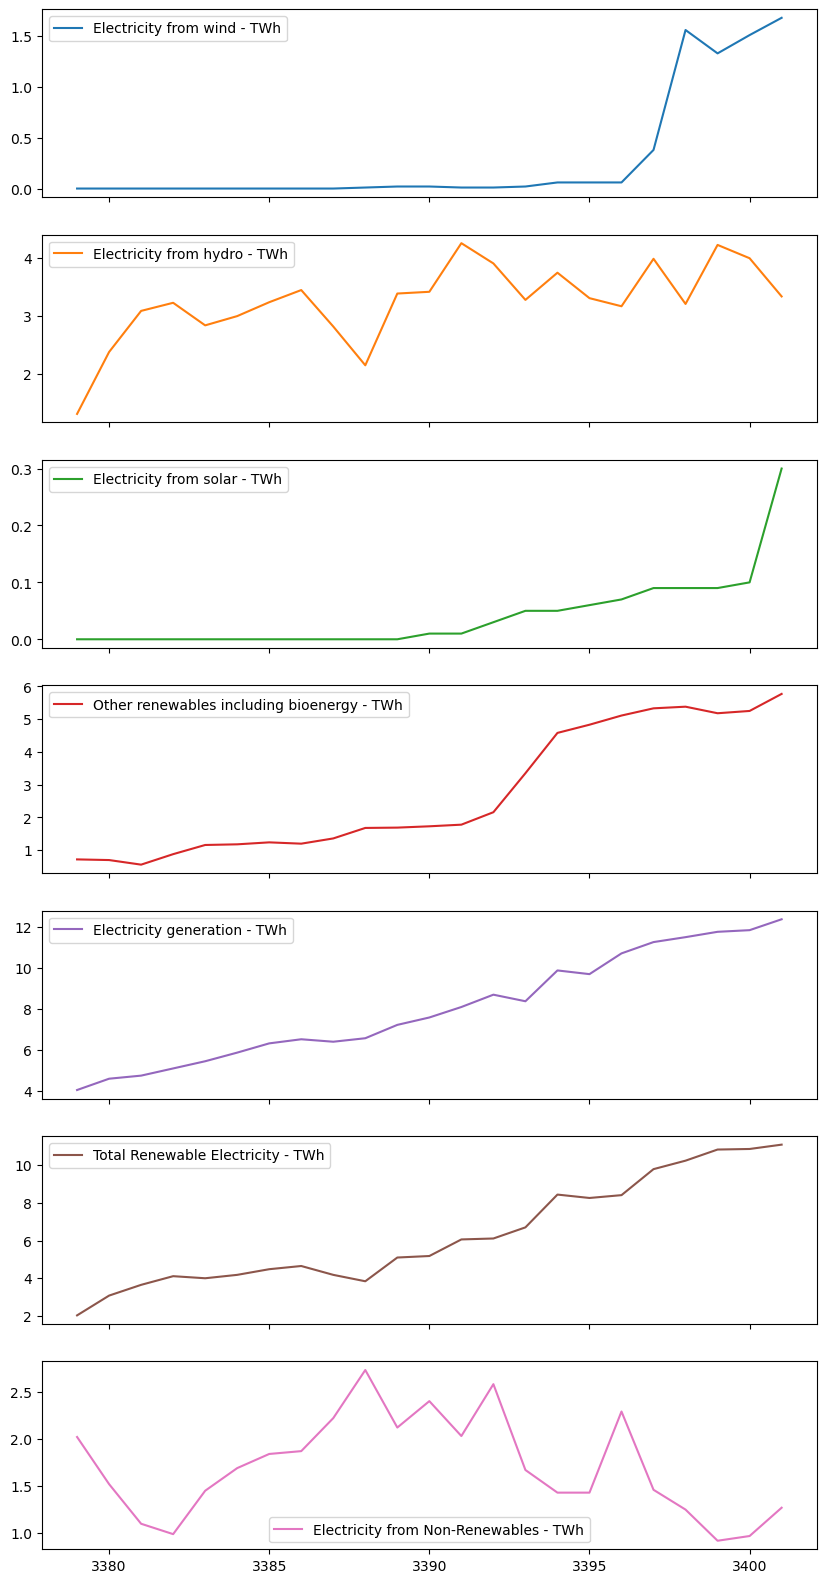

In [74]:
merged_df.loc[merged_df['Entity'] == 'Kenya', ['Electricity from wind - TWh', 'Electricity from hydro - TWh',
       'Electricity from solar - TWh',
       'Other renewables including bioenergy - TWh',
       'Electricity generation - TWh', 'Total Renewable Electricity - TWh',
       'Electricity from Non-Renewables - TWh']].plot(figsize=(10,20), subplots= True)